Generating training data...
Training model...
Epoch 0, Loss: 2.108839
Epoch 500, Loss: 0.501326
Epoch 1000, Loss: 0.500881
Epoch 1500, Loss: 0.500676
Generating predictions...


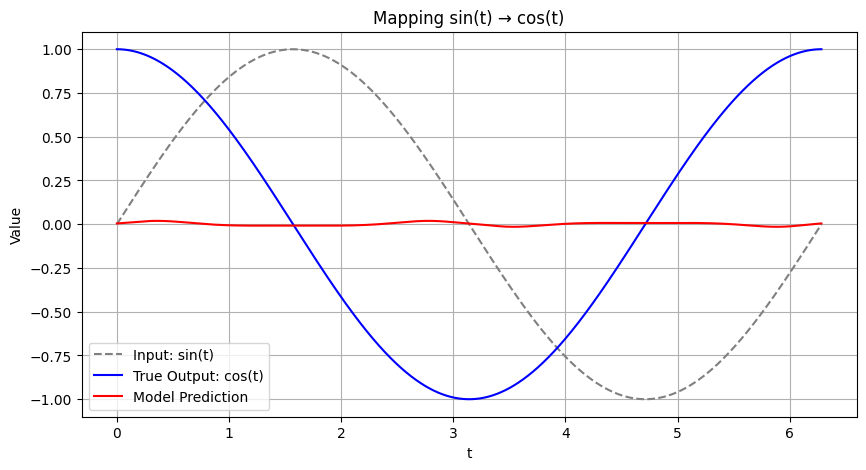

sin²(t) + predicted cos²(t) ≈ 0.499590 ± 0.353687


In [4]:
# Task 2 – Mapping sin(t) → cos(t)

import numpy as np
import matplotlib.pyplot as plt

# Define a simple feedforward neural network
class SimpleNeuralNetwork:
    def __init__(self, layers, learning_rate=0.01):
        self.layers = layers
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []

        for i in range(len(layers) - 1):
            weight = np.random.randn(layers[i], layers[i+1]) * np.sqrt(2.0 / layers[i])
            bias = np.zeros((1, layers[i+1]))
            self.weights.append(weight)
            self.biases.append(bias)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def forward(self, X):
        self.activations = [X]
        self.z_values = []
        current_input = X

        for i in range(len(self.weights)):
            z = np.dot(current_input, self.weights[i]) + self.biases[i]
            self.z_values.append(z)

            if i < len(self.weights) - 1:
                activation = self.tanh(z)
            else:
                activation = z  # Linear output

            self.activations.append(activation)
            current_input = activation

        return self.activations[-1]

    def backward(self, X, y, output):
        m = X.shape[0]
        delta = output - y
        deltas = [delta]

        for i in reversed(range(len(self.weights) - 1)):
            delta = np.dot(delta, self.weights[i+1].T) * self.tanh_derivative(self.z_values[i])
            deltas.append(delta)

        deltas.reverse()

        for i in range(len(self.weights)):
            dW = (1/m) * np.dot(self.activations[i].T, deltas[i])
            db = (1/m) * np.sum(deltas[i], axis=0, keepdims=True)

            self.weights[i] -= self.learning_rate * dW
            self.biases[i] -= self.learning_rate * db

    def train(self, X, y, epochs=2000):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            self.backward(X, y, output)
            if epoch % 500 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

    def predict(self, X):
        return self.forward(X)


# Step 1: Generate training data
print("Generating training data...")
t = np.linspace(0, 2 * np.pi, 1000)
X = np.sin(t).reshape(-1, 1)
y = np.cos(t).reshape(-1, 1)

# Step 2: Train the model
print("Training model...")
model = SimpleNeuralNetwork([1, 16, 16, 1], learning_rate=0.01)
model.train(X, y, epochs=2000)

# Step 3: Predict and visualize
print("Generating predictions...")
y_pred = model.predict(X)

plt.figure(figsize=(10, 5))
plt.plot(t, X, '--', label='Input: sin(t)', color='gray')
plt.plot(t, y, label='True Output: cos(t)', color='blue')
plt.plot(t, y_pred, label='Model Prediction', color='red')
plt.title('Mapping sin(t) → cos(t)')
plt.xlabel('t')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('sin_cos_plot.png')
plt.show()

# Step 4: Trigonometric Identity Check
identity = X.flatten()**2 + y_pred.flatten()**2
print(f"sin²(t) + predicted cos²(t) ≈ {identity.mean():.6f} ± {identity.std():.6f}")

